# Problem Set 2

For this problem set we will validate the tree attributes we went over in class and practice manipulating tree-sequences.

__ASSIGNMENT__
- There are five problems each with multiple components.
- The following python modules are required to complete this problem set, however, you can use other modules at your own risk.
- Do not alter the simulation code for problem three.
- You may not work with other students, but you may ask the instructor questions by email or by coming to office hours, reference package documentation, reference coding exercises from previous lectures, and refernce the course GitHub.

__HELPFUL HINTS__
- [`msprime` documentation](https://tskit.dev/msprime/docs/stable/intro.html)
- [`tskit` documentation](https://tskit.dev/tskit/docs/stable/introduction.html)
- Feel free to add more cells if needed!
- Take a deep breath, and remember that you are very capable!

In [2]:
# Import modules.
from matplotlib import pyplot as plt
import msprime
import numpy as np
import pandas as pd

## $\mathbb{E}[T_{MRCA}]$
__(1)__ Validate the expected time to most recent common ancestor as a function of $n$ haploid samples—ie $\mathbb{E} \left(T_{MRCA} \right) = \sum_{i=2}^{n} \mathbb{E} \left(T_{i} \right)$ where $\mathbb{E} \left(T_{i} \right) = \frac{N}{\binom{i}{2}}$. Make a plot and table to compare the analytical results versus the mean of 1,000 replicate simulations and provide some interpretation of what your plot and table show.

In [3]:
# 1000 replicates for each n (for multiple n) and calculate T_mrca (root node or SUM Tis)
ns = range(10,100)
N = 1e4

# INITIATE LISTS TO STORE MRCA
mean_mrcas = []
expected_mrcas = []

# FOR EACH n SAMPLE VALUE
for i in ns:
    mrcas = []

    # CREATE 1000 TREES
    ts_reps = msprime.sim_ancestry(
        samples=i,
        population_size=N,
        ploidy=1,
        num_replicates = 1000,
        random_seed=1
    )
    
    # FIND E[T_MRCA] FOR GIVEN n
    E_T_mrca = 2*N*(1-(1/i))

    # FOR EACH TREE, FIND MRCA
    for ts in ts_reps:
        tree = ts.first()
        root = tree.root
        mrcas.append(tree.time(root))

    # AVG MRCAS and RECORD E[T_MRCA]
    mean_mrcas.append(np.mean(mrcas))
    expected_mrcas.append(E_T_mrca)
        
# Then plot function and see if it resembles E(T_mrca)

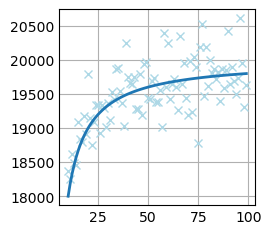

In [4]:
# PLOTTING
plt.style.use('_mpl-gallery')

x = np.array(range(10,100)) # x-axis ranges from 10 to 100

# y for the simulated values and y2 for the theoretical
y = np.array(mean_mrcas)
y2 = np.array(expected_mrcas)

fig, ax = plt.subplots()
ax.plot(x, y, 'x',color="lightblue", linewidth=2) # scatter simulated
ax.plot(x, y2, linewidth=2.0)                     # line for theoretical

plt.show()

# X Marks show simulated MRCAs
# Line shows theoretical
# The distribution does seem to match up, though there is variation in the simulated example

## $\mathbb{E}[T_{tot}]$
__(2)__ Validate the total tree height as a function of $n$ haploid samples—ie $\mathbb{E} \left(T_{tot} \right) = \sum_{i=2}^{n} i \times \mathbb{E} \left(T_{i} \right)$ where $\mathbb{E} \left(T_{i} \right) = \frac{N}{\binom{i}{2}}$. Make a plot and table to compare the analytical results versus the mean of 1,000 replicate simulations and provide some interpretation of what your plot and table show.

In [5]:
# n sizes range from 10 to 1000
ns = range(10,100)
# N population size is 1e4
N = 1e4

# INSTANTIATE LISTS
mean_tots = []
expected_tots = []

# FOR EACH n VALUE
for n in ns:
    tots = []
    # SIMULATE 1000 trees
    ts_reps = msprime.sim_ancestry(
        samples=n,
        population_size=N,
        ploidy=1,
        num_replicates = 1000,
        random_seed=1
    )
    
    # FIND E[T_tot]
    E_T_tot = 2*N * np.sum(1/np.array(range(1,(n))))

    # FOR EACH TREE 
    for ts in ts_reps:
        tree = ts.first()
        tots.append(tree.total_branch_length) # find total tree height

    # RECORD
    mean_tots.append(np.mean(tots))
    expected_tots.append(E_T_tot)

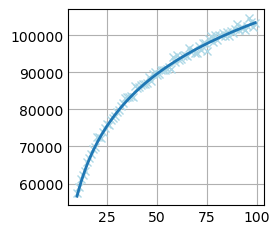

In [6]:
# PLOTTING
plt.style.use('_mpl-gallery')

x = np.array(range(10,100))
y = np.array(mean_tots)
y2 = np.array(expected_tots)

fig, ax = plt.subplots()
ax.plot(x, y, 'x',color="lightblue", linewidth=2)
ax.plot(x, y2, linewidth=2.0)

plt.show()

# X Marks show simulated total branch lengths
# Line shows theoretical
# The distribution matches up very well

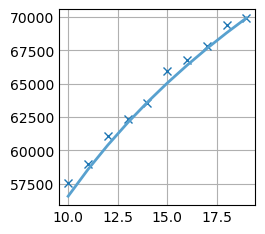

In [7]:
# Another plot with n 10 to 20 for visualization

x = np.array(range(10,20))
y = np.array(mean_tots[:10])
y2 = np.array(expected_tots[:10])

fig, ax = plt.subplots()
ax.plot(x, y, 'x', linewidth=2)
ax.plot(x, y2, linewidth=2.0)

plt.show()

## Tree-Sequences
__(3)__ Run the simulation in the cell below and then report the following information by accessing the tree-sequence—ie you can't just visualize the tree-sequence:

- The number of trees in the tree-sequence.
- The positions of the recombination break points.
- The branching order of the leaves—aka topology—for each tree.
- The time of the first coalescent event for each tree.
- The time of the most recent common ancestor among all samples for each tree.
- The total tree height for each tree.

In [8]:
# Run this cell WITHOUT altering the simulation.
ts = msprime.sim_ancestry(
    samples=3,
    population_size=1e6,
    ploidy=1,
    sequence_length=1_000,
    recombination_rate=1e-9,
    random_seed=42
)

In [9]:
# TRAVERSING THE TREE

num_trees = len(ts.trees())
for tree in ts.trees():
    # tree index
    indx = tree.index
    # recombination points (genomic interval)
    inter = tree.interval
    # topology (?)
    topo = tree.newick()

    # time for first coalescence
    fc_node = None
    fc_time = float("inf")
    # ITERATE OVER ALL NODES
    for node in tree.nodes():
        if tree.is_internal(node): # CHECK INTERNAL
            time = tree.time(node) # TIME OF NODE
            if time < fc_time: # CHECK IF SMALLER THAN OTHER TIMES
                fc_node = node # IF YES SET NODE TO THIS ONE
                fc_time = time # ALSO UPDATE TIME TO THIS ONE

    # time to MRCA
    root = tree.root
    mrca = tree.time(root)
    # total tree height
    tot = tree.total_branch_length

    print(f"""Tree {indx} spans {inter} and coalesces first at time {fc_time} at node {fc_node}.
            The time to the most recent common ancestor for all samples is {mrca} and the total
            tree height is {tot}\n
    The topology is: {topo} \n""")

Tree 0 spans Interval(left=0.0, right=191.0) and coalesces first at time 332619.0997940383 at node 4.
            The time to the most recent common ancestor for all samples is 1520325.6746264254 and the total
            tree height is 3373270.4490468884

    The topology is: (1:1520325.67462642537430,(2:332619.09979403828038,3:332619.09979403828038):1187706.57483238703571); 

Tree 1 spans Interval(left=191.0, right=852.0) and coalesces first at time 315063.6581368176 at node 3.
            The time to the most recent common ancestor for all samples is 332619.0997940383 and the total
            tree height is 980301.8577248942

    The topology is: (2:332619.09979403828038,(1:315063.65813681762666,3:315063.65813681762666):17555.44165722065372); 

Tree 2 spans Interval(left=852.0, right=1000.0) and coalesces first at time 332619.0997940383 at node 4.
            The time to the most recent common ancestor for all samples is 467961.8276543305 and the total
            tree height is 12

In [10]:
print(ts.draw_text())

1520325.67┊   6   ┊       ┊       ┊  
          ┊ ┏━┻┓  ┊       ┊       ┊  
467961.83 ┊ ┃  ┃  ┊       ┊   5   ┊  
          ┊ ┃  ┃  ┊       ┊ ┏━┻┓  ┊  
332619.10 ┊ ┃  4  ┊   4   ┊ ┃  4  ┊  
          ┊ ┃ ┏┻┓ ┊  ┏┻━┓ ┊ ┃ ┏┻┓ ┊  
315063.66 ┊ ┃ ┃ ┃ ┊  3  ┃ ┊ ┃ ┃ ┃ ┊  
          ┊ ┃ ┃ ┃ ┊ ┏┻┓ ┃ ┊ ┃ ┃ ┃ ┊  
0.00      ┊ 0 1 2 ┊ 0 2 1 ┊ 0 1 2 ┊  
          0      191     852    1000 



## Choosing number of samples to simulate

__(4)__ Below we will show you a plot of the expected number of segregating sites in a simulated dataset (y-axis) for different numbers of simulated samples (x-axis). Explain the behavior of the graph as the number of samples increases, and how this would impact your decision on how many samples to simulate for your own projects.

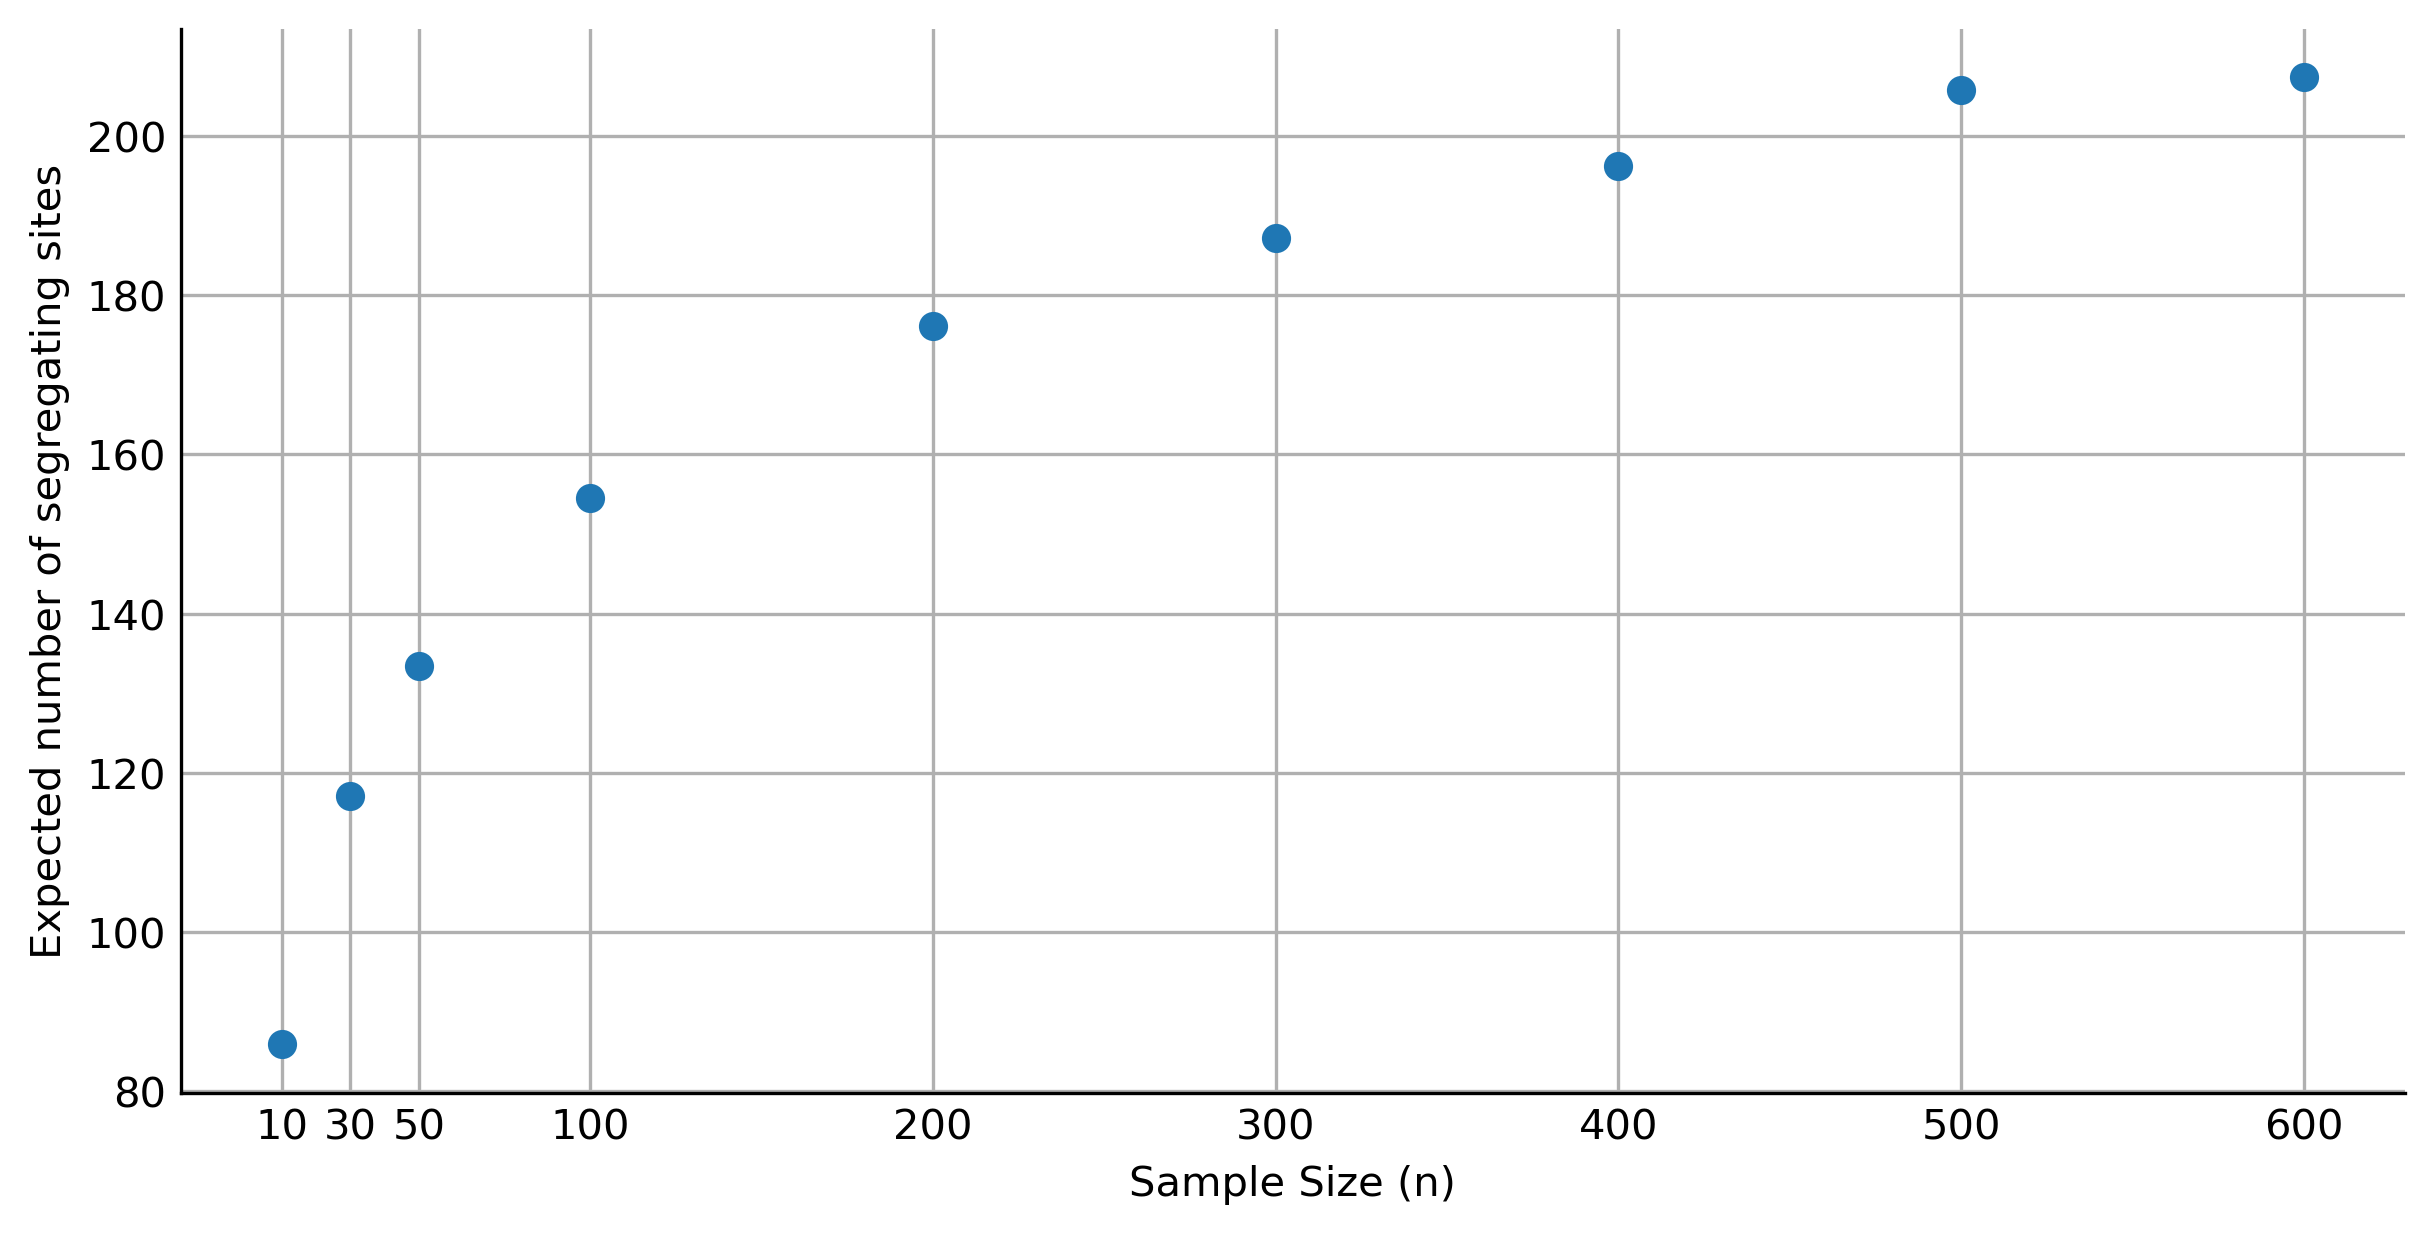

In [11]:
# Intialize an array of sample sizes.
N = np.array([10, 30, 50, 100, 200, 300, 400, 500, 600])
# Define the number of replicate simulations to run.
n_reps = 1_000
# Intialize an empty array to store the results.
sim_mean_seg_sites = np.array([])
# For every sample size...
for sample_size in N:
    # Intialize an empty list to store results.
    seg_sites = []
    # For every tree-sequence...
    for ts in msprime.sim_ancestry(samples=sample_size, ploidy=1, sequence_length=100_000,
                                   population_size=10_000, discrete_genome=False, num_replicates=n_reps):
        # Overlay mutations on the tree-sequence.
        mts = msprime.sim_mutations(tree_sequence=ts, rate=1.5 * 10**-8, model='jc69', discrete_genome=False)
        # Append the results with the number of segregating sites. 
        seg_sites.append(mts.genotype_matrix().shape[0])
    # Append the mean number of segregating sites from 1000 simulations.
    sim_mean_seg_sites = np.append(sim_mean_seg_sites, np.mean(np.array(seg_sites)))

# Intialize the figure.
fig = plt.figure(figsize=(8, 4), constrained_layout=True, dpi=300)
# Intialize the axes.
ax = fig.add_subplot(111)
# Plot the simulated results.
ax.scatter(N, sim_mean_seg_sites)
# Despine the axes.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Label the x-axis ticks.
ax.set_xticks(N)
ax.set_xticklabels(N)
# Label the axes.
plt.xlabel('Sample Size (n)')
plt.ylabel('Expected number of segregating sites')
# Show!
plt.show()

**Your Answer:** As the number of samples increase, the expected number of segregating sites increases. However, this relationship is not strictly linear, and seems to taper off as the sample size increases. As n is larger, there are more mutations that occur over the tree, and this means more data in terms of the SFS. For my own projects, it would make sense to simulate a tree with a higher sample size so that more segregating sites appear, which is more informative for the resulting distribution and plot.

## Expected allele frequencies

__(5)__ Simulate a dataset that includes mutations. You can choose all parameters of your simulation. Find the Site Frequency Spectrum (Hint: take a look at the `allele_frequency_spectrum()` function available in `msprime`). Plot your simulated SFS along with the theoretical expectations of the allele frequencies.

In [12]:
# SIMULATE
mu = 7.5e-6
N = 1e6
n = 500

ts = msprime.sim_ancestry(
    samples=n,
    population_size=N,
    ploidy=1,
    random_seed=1
)

mts = msprime.sim_mutations(
    tree_sequence=ts,
    rate=mu,
    random_seed=1,
    discrete_genome=False,
)

In [13]:
# FIND AFS
afs = mts.allele_frequency_spectrum()
afs = afs.astype(int)
# BIN
afs_binned = np.bincount(afs)[1:-1]


# the expectation of each frequency is given by...
theta = mu*2*N
expected_freq = []
for each in range(1,np.max(afs)):
    E_S_n = theta/each
    expected_freq.append(E_S_n)

expected_freq = np.array(expected_freq)
# PRINT
print(afs_binned)
print(expected_freq)

[12  5  1  1  1  1  0  0  0  0  1  0  0  0  1  0  0]
[15.          7.5         5.          3.75        3.          2.5
  2.14285714  1.875       1.66666667  1.5         1.36363636  1.25
  1.15384615  1.07142857  1.          0.9375      0.88235294]


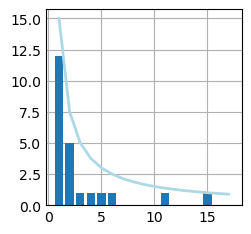

In [14]:
# PLOTTING
x = np.array(range(1,np.max(afs)))
y = afs_binned
y2 = expected_freq

fig, ax = plt.subplots()
ax.bar(x, y)
ax.plot(x, y2, color="lightblue",linewidth=2.0)

plt.show()

In [ ]:
## The expected value of each S_n creates the curve, which pretty closely matches the simulated values